In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import shutil
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.experimental import preprocessing

2023-12-17 14:12:18.465993: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-17 14:12:18.697641: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 14:12:18.697734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 14:12:18.741544: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 14:12:18.844091: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-17 14:12:18.846126: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [114]:
load_model = tf.keras.models.load_model("model/ecobin_model4.h5")

In [3]:
CLASSES = ["biodegradable", "cardboard", "glass", "metal", "paper", "plastic"]

In [4]:
PATH_DATASET=r"mnt/c/Users/Felicia Pangestu/Documents/BANGKIT/Capstone/splitedDataset"
TRAIN_DIR=r"/mnt/c/Users/Felicia Pangestu/Documents/BANGKIT/Capstone/splitedDataset/train_ds"
VAL_DIR=r"/mnt/c/Users/Felicia Pangestu/Documents/BANGKIT/Capstone/splitedDataset/val_ds"
TEST_DIR=r"/mnt/c/Users/Felicia Pangestu/Documents/BANGKIT/Capstone/splitedDataset/test_ds"

def create_datasets(path_dataset):
    train_ds = tf.keras.utils.image_dataset_from_directory(
        TRAIN_DIR,
        seed=0,
        batch_size=20,
        label_mode='categorical',
        image_size=(256, 256),
    )

    validation_ds = tf.keras.utils.image_dataset_from_directory(
        VAL_DIR,
        seed=0,
        batch_size=20,
        label_mode='categorical',
        image_size=(256, 256),
    )

    test_ds = tf.keras.utils.image_dataset_from_directory(
        TEST_DIR,
        seed=0,
        batch_size=20,
        label_mode='categorical',
        image_size=(256, 256),
    )

    return train_ds, validation_ds, test_ds

train_ds, validation_ds, test_ds = create_datasets(PATH_DATASET)

Found 9091 files belonging to 6 classes.
Found 2597 files belonging to 6 classes.
Found 1303 files belonging to 6 classes.


# PREDICT

In [115]:
# #  FROM VALIDATION
# wrong_ds = []

# counter = {i: [0] * len(CLASSES) for i in range(len(CLASSES))}

# for img, label in validation_ds.unbatch().as_numpy_iterator():
#     img = img.astype("uint8")

#     predict_label = load_model.predict(img[np.newaxis, ...])
#     predict_label_idx = np.argmax(predict_label[0], axis=-1)

#     # Check if prediction is incorrect
#     if predict_label_idx != np.argmax(label):
#         wrong_ds.append((img, predict_label_idx, np.argmax(label)))

#     counter[np.argmax(label)][predict_label_idx] += 1

# print(counter)
# # sort based true label
# wrong_ds.sort(key=lambda x: x[2])
# print("Total salah dari validation_ds: ", len(wrong_ds))

1/1 [==============================] - 0s 81ms/step


KeyboardInterrupt: 

In [ ]:
wrong_ds = []

counter = {i: [0] * len(CLASSES) for i in range(len(CLASSES))}

for img, label in validation_ds.unbatch().as_numpy_iterator():
    img = img.astype("uint8")

    predict_label = load_model.predict(img[np.newaxis, ...])
    predict_label_idx = np.argmax(predict_label[0], axis=-1)

    # Visualize the image with its true label and predicted label
    plt.imshow(img)
    plt.title(f'True Label: {CLASSES[np.argmax(label)]}, Predicted Label: {CLASSES[predict_label_idx]}')
    plt.show()

    # Check if prediction is incorrect
    if predict_label_idx != np.argmax(label):
        wrong_ds.append((img, predict_label_idx, np.argmax(label)))

    counter[np.argmax(label)][predict_label_idx] += 1

print(counter)

In [144]:
img_path = r"/mnt/c/Users/Felicia Pangestu/Documents/BANGKIT/Capstone/splitedDataset/train_ds/cardboard/cardboard1.jpeg"

In [145]:
from tensorflow.keras.preprocessing import image
img = image.load_img(img_path, target_size=(256, 256)) 
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

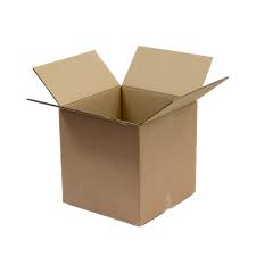

In [149]:
img

In [155]:
predictions = load_model.predict(img_array)

1/1 [==============================] - 0s 90ms/step


In [156]:
predicted_class_index = np.argmax(predictions[0])

In [157]:
print("Predicted Class Index:", CLASSES[predicted_class_index])

Predicted Class Index: cardboard


In [14]:
test_images = []
test_labels = []

for img, label in test_ds.unbatch().as_numpy_iterator():
    img = img.astype("uint8")
    test_images.append(img)
    test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Evaluate the model on the validation dataset
loss, acc = load_model.evaluate(test_images, test_labels)

print(f"Validation Loss: {loss}, Validation Accuracy: {acc}")

41/41 [==============================] - 73s 2s/step - loss: 0.1578 - accuracy: 0.9440
Validation Loss: 0.15778324007987976, Validation Accuracy: 0.9439754486083984
